#Import Necessary Libraries

In [1]:
import numpy as np                      # numpy used for mathematical operation on array
import pandas as pd                     # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt         # matplotlib used for data visualization
import seaborn as sns                   # seaborn used for data visualization
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

#Reading Dataset



In [2]:
# Reading Both the datasets with pandas

df1 = pd.read_csv("/content/suicide(1).csv")
df2 = pd.read_csv("/content/suicide(2).csv")

In [3]:
# Reading first 5 Rows of the dataset 1

df1.head()

,id,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,1,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,2,Albania1987,NaN,"2,156,624,900",NaN,Silent
2,3,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,4,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,5,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [4]:
# Checking the shape of the dataset 1

df1.shape

(27820, 6)

In [5]:
# Reading first 5 Rows of the dataset 2

df2.head()

,id,country,year,sex,age,suicides_no,population,suicides/100k pop
0,1,Albania,1987.0,male,NaN,21,312900.0,6.71
1,2,Albania,1987.0,male,NaN,16,308000.0,5.19
2,3,Albania,NaN,female,15-24 years,14,289700.0,4.83
3,4,Albania,1987.0,male,75+ years,1,NaN,4.59
4,5,Albania,1987.0,male,25-34 years,9,274300.0,3.28


In [6]:
# Checking the shape of the dataset 2

df2.shape

(27820, 8)

In [11]:
# Merging both the dataset 

df = pd.merge(df2, df1, on=['id'])

In [12]:
# Reading first 5 Rows of the data

df.head()

,id,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,1,Albania,1987.0,male,NaN,21,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,2,Albania,1987.0,male,NaN,16,308000.0,5.19,Albania1987,NaN,"2,156,624,900",NaN,Silent
2,3,Albania,NaN,female,15-24 years,14,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,4,Albania,1987.0,male,75+ years,1,NaN,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,5,Albania,1987.0,male,25-34 years,9,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [13]:
# Reading last 5 Rows of the data

df.tail()

,id,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,27816,Uzbekistan,2014.0,female,35-54 years,107,3620833.0,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Generation X
27816,27817,Uzbekistan,2014.0,female,NaN,9,348465.0,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Silent
27817,27818,Uzbekistan,2014.0,male,5-14 years,60,2762158.0,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Generation Z
27818,27819,Uzbekistan,2014.0,female,NaN,44,NaN,1.67,Uzbekistan2014,0.675,"63,067,077,179",NaN,Generation Z
27819,27820,Uzbekistan,2014.0,female,NaN,21,1438935.0,1.46,Uzbekistan2014,0.675,"63,067,077,179",NaN,Boomers


In [14]:
# Checking the shape of the data

df.shape

(27820, 13)

In [15]:
# Droping the unwanted columns

df.drop(columns='country-year', inplace=True)

In [16]:
# Checking the shape of the data

df.shape

(27820, 12)

In [17]:
# Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27820 non-null  int64  
 1   country             27820 non-null  object 
 2   year                22820 non-null  float64
 3   sex                 27820 non-null  object 
 4   age                 23820 non-null  object 
 5   suicides_no         27820 non-null  int64  
 6   population          23201 non-null  object 
 7   suicides/100k pop   27820 non-null  float64
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  23820 non-null  float64
 11  generation          27820 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.8+ MB


In [18]:
# Checking the summary statistics of the dataset

df.describe(include='all')

,id,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820.000000,27820,22820.000000,27820,23820,27820.000000,23201,27820.000000,8364.000000,27820,23820.000000,27820
unique,NaN,101,NaN,2,6,NaN,19770,NaN,NaN,2321,NaN,6
top,NaN,Mauritius,NaN,male,75+ years,NaN,?,NaN,NaN,"2,156,624,900",NaN,Generation X
freq,NaN,382,NaN,13910,3995,NaN,2000,NaN,NaN,12,NaN,6408
mean,13910.500000,NaN,2001.248861,NaN,NaN,242.574407,NaN,12.816097,0.776601,NaN,16866.340932,NaN
std,8031.086581,NaN,8.480176,NaN,NaN,902.047917,NaN,18.961511,0.093367,NaN,18982.101624,NaN
min,1.000000,NaN,1985.000000,NaN,NaN,0.000000,NaN,0.000000,0.483000,NaN,251.000000,NaN
25%,6955.750000,NaN,1994.000000,NaN,NaN,3.000000,NaN,0.920000,0.713000,NaN,3447.000000,NaN
50%,13910.500000,NaN,2002.000000,NaN,NaN,25.000000,NaN,5.990000,0.779000,NaN,9356.000000,NaN
75%,20865.250000,NaN,2008.000000,NaN,NaN,131.000000,NaN,16.620000,0.855000,NaN,24796.000000,NaN


In [19]:
# Checking the null values of the data

df.isnull()

,id,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,True,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False,True,False,True,False
2,False,False,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,False,False,False,False,False,False,False,False,False,False,False,False
27816,False,False,False,False,True,False,False,False,False,False,False,False
27817,False,False,False,False,False,False,False,False,False,False,False,False
27818,False,False,False,False,True,False,True,False,False,False,True,False


In [20]:
# We can see the data types of each column in a tabular format.

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
id,int64
country,object
year,float64
sex,object
age,object
suicides_no,int64
population,object
suicides/100k pop,float64
HDI for year,float64
gdp_for_year ($),object


In [21]:
# identifying the missing values of each column in a tabular format.

Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
id,int64,0
country,object,0
year,float64,5000
sex,object,0
age,object,4000
suicides_no,int64,0
population,object,4619
suicides/100k pop,float64,0
HDI for year,float64,19456
gdp_for_year ($),object,0


In [22]:
# identifying the unique values of each column in a tabular format.

Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,MissingVal,UniqueVal
id,int64,0,27820
country,object,0,101
year,float64,5000,32
sex,object,0,2
age,object,4000,6
suicides_no,int64,0,2084
population,object,4619,19770
suicides/100k pop,float64,0,5298
HDI for year,float64,19456,305
gdp_for_year ($),object,0,2321


In [23]:
# identifying count of the variable.

Data_dict['Count'] = df.count()
Data_dict

,0,MissingVal,UniqueVal,Count
id,int64,0,27820,27820
country,object,0,101,27820
year,float64,5000,32,22820
sex,object,0,2,27820
age,object,4000,6,23820
suicides_no,int64,0,2084,27820
population,object,4619,19770,23201
suicides/100k pop,float64,0,5298,27820
HDI for year,float64,19456,305,8364
gdp_for_year ($),object,0,2321,27820


In [24]:
# Checking the sum of null values of the data

df.isnull().sum()

id                        0
country                   0
year                   5000
sex                       0
age                    4000
suicides_no               0
population             4619
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)     4000
generation                0
dtype: int64

In [25]:
# Impute numerical null values with median value

df['year'].fillna(df['year'].median(), inplace=True)
df['HDI for year'].fillna(df['HDI for year'].median(), inplace=True)
df['gdp_per_capita ($)'].fillna(df['gdp_per_capita ($)'].median(), inplace=True)

In [26]:
# Impute "categorical null values" with Mode value

df['age'].fillna(df['age'].mode()[0], inplace=True)
df['population'].fillna(df['population'].mode()[0], inplace=True)

In [27]:
# Checking the sum of null values of the updated data

df.isnull().sum()

id                    0
country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

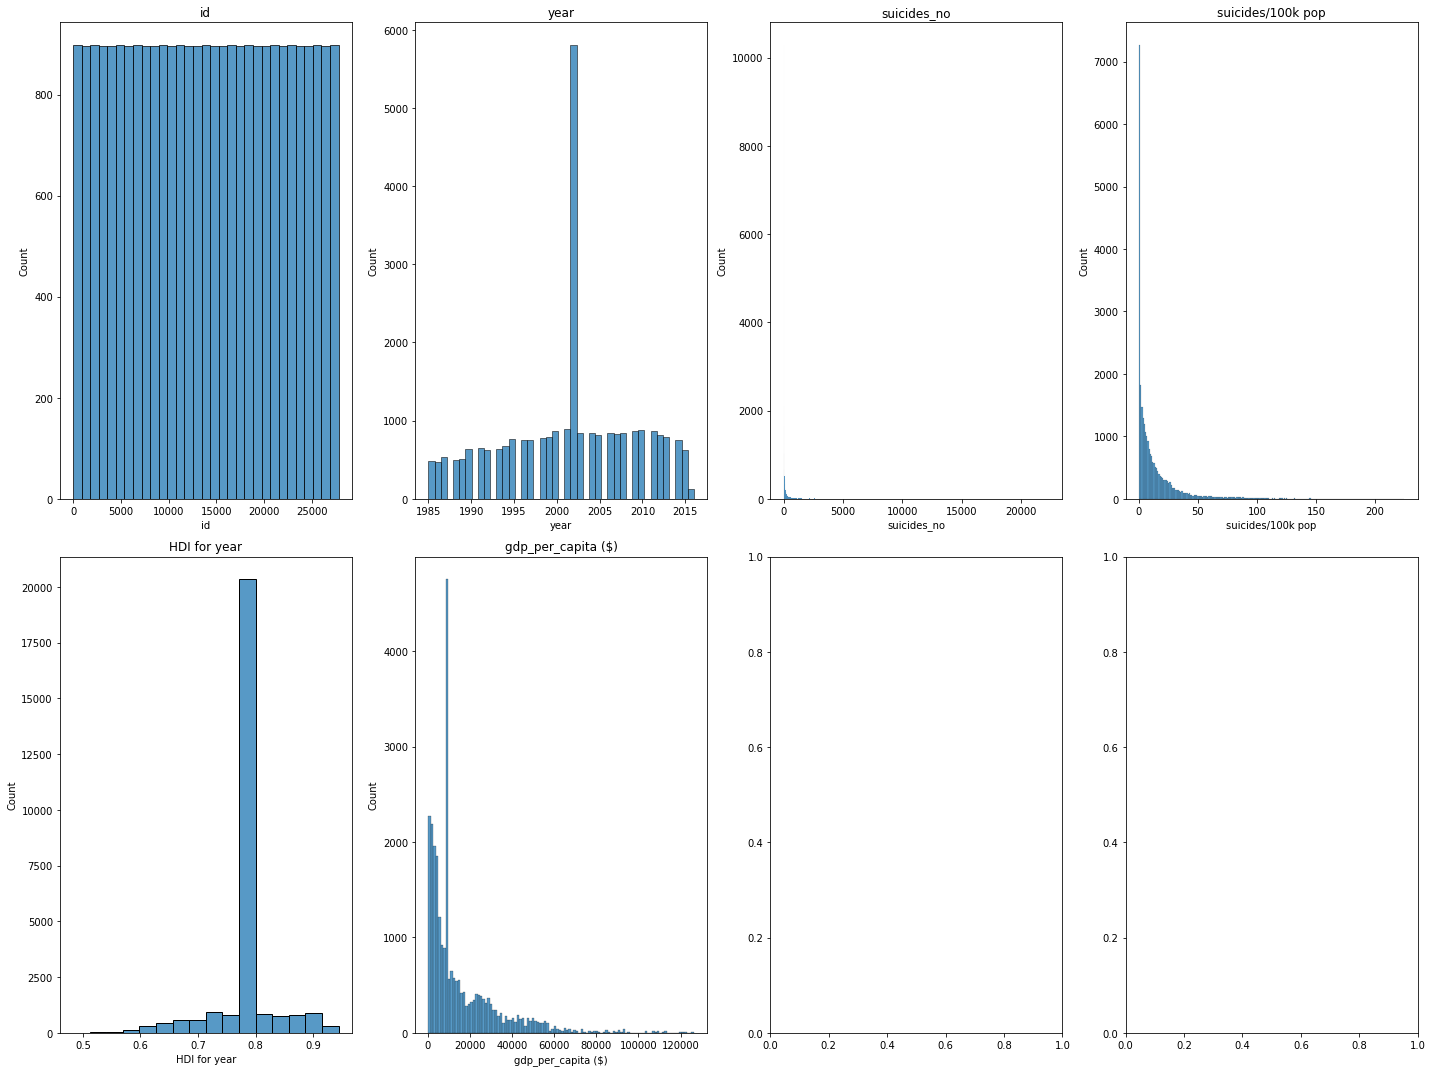

In [30]:
"""
The code generates a grid of subplots where each subplot shows the distribution,
(i.e., histogram) of a variable/column in the df DataFrame.
This type of plot can be useful for exploring the shape and spread of each variable in a dataset.
"""

# Select only the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots of histograms for each numerical column
n_rows = 2  # Number of rows in the subplot grid
n_cols = 4  # Number of columns in the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))
for i, col in enumerate(num_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r][c]
    sns.histplot(df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<AxesSubplot:>

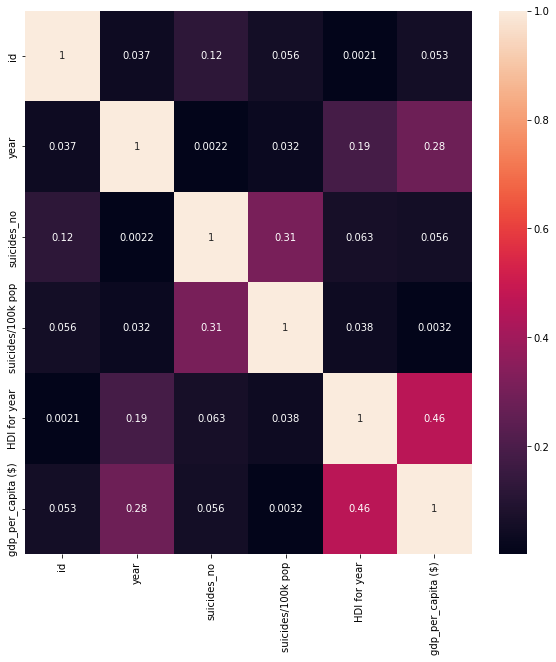

In [29]:
"""
Heatmap function to visualize the correlation matrix of the columns.
It hows the pairwise correlations (i.e., linear relationships) between all pairs of variables/columns in the DataFrame.
"""

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr().abs(),annot=True)

In [ ]:
"""
This graps provide a basic summary and visualization of the distribution of the basesalary column.
The x-axis of the histogram will represent the range of basesalary values, divided into several bins, 
and the y-axis will represent the frequency of observations falling into each bin. 


df.describe()
plt.hist(df['area'])
plt.show()
"""

In [ ]:
# Scatterplot, with df.index as the values for the x-axis and df['area'] as the values for the y-axis.

#plt.scatter(df.index, df['area'])
#plt.show()

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select categorical variables (assuming they are in object data type)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Label encode categorical variables
le = LabelEncoder()
for col in cat_vars:
    df[col] = le.fit_transform(df[col])

In [32]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc)) 

Column id outliers = 0.00%
Column country outliers = 0.00%
Column year outliers = 0.00%
Column sex outliers = 0.00%
Column age outliers = 0.00%
Column suicides_no outliers = 14.08%
Column population outliers = 0.00%
Column suicides/100k pop outliers = 7.35%
Column HDI for year outliers = 100.00%
Column  gdp_for_year ($)  outliers = 0.00%
Column gdp_per_capita ($) outliers = 6.47%
Column generation outliers = 0.00%


In [33]:
# Select numerical variables with outliers (assuming they are in float data type)

num_vars = df.select_dtypes(include=['float','int']).columns.tolist()



# Replace outliers with the maximum and minimum values of each variable

for col in num_vars:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)
    df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else x)

In [34]:
import pandas as pd
import numpy as np

# Define function to treat outliers in a column
def treat_outliers(col):
    mean = np.mean(col)
    std = np.std(col)
    threshold = 3
    outlier_indices = col[np.abs(col - mean) > std * threshold].index
    col[outlier_indices] = mean

# Treat outliers in each column of the dataset
for col in df.columns:
    treat_outliers(df[col])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27820 non-null  float64
 1   country             27820 non-null  float64
 2   year                27820 non-null  float64
 3   sex                 27820 non-null  float64
 4   age                 27820 non-null  float64
 5   suicides_no         27820 non-null  float64
 6   population          27820 non-null  float64
 7   suicides/100k pop   27820 non-null  float64
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  float64
 10  gdp_per_capita ($)  27820 non-null  float64
 11  generation          27820 non-null  float64
dtypes: float64(12)
memory usage: 3.8 MB


In [ ]:
# Split the data into features and target

features = df.drop(['area'], axis=1).values
target = df['area'].values.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33,  random_state = 2)

###Comparing the error with SKLearn Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [ ]:
sk_model.fit(X_train, y_train)

In [ ]:
sk_train_data_prediction = sk_model.predict(X_train)

In [ ]:
test_data_prediction = sk_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# R squared error
score_1_ = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(y_test, test_data_prediction)


print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

#LASSO REGRESSION

In [ ]:
# creating a class for Lasso Regression

class Lasso_Regression():

    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
    
    def set_params(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
        return self

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.w[i] > 0:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) + self.lambda_parameter) / self.m
            else:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) - self.lambda_parameter) / self.m

        db = - 2 * np.sum(self.y - Y_prediction) / self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        return X.dot(self.w) + self.b
    
    def score(self, X, y):
        Y_prediction = self.predict(X)
        return 1 - ((y - Y_prediction) ** 2).sum() / ((y - y.mean()) ** 2).sum()


    


  # Predicting the Target variable
    def predict(self,X):
      return np.dot(X, self.w.reshape(-1,1)) + self.b
  
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
        if len(y_true) != len(y_pred):
            raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
        squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
        mse1 = sum(squared_differences) / len(squared_differences)
      
        return mse1
    def r2(self,y_true, y_pred):
    # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
    
    # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
    
      return r2_score

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Lasso_Regression(learning_rate= 0.1, no_of_iterations= 200, lambda_parameter= 0.01)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
from sklearn import metrics

# R squared error
score_1 = model.r2(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = model.mean_squared_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Squared Error : ', score_2)